In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
db_conn = psycopg2.connect(user="root", password='password', host="covid.cm5sr8tqgvlt.us-east-2.rds.amazonaws.com", port="5432", database="postgres")


In [51]:
results = pd.read_sql_query("SELECT * FROM country_cases WHERE country LIKE 'United States%' AND confirmed > 0", db_conn)

In [52]:
results.head()

,recovered,deaths,country,confirmed,active_cases,record_date,province
0,0,1192,United States of America,21633,20441,2020-05-16,Colorado
1,0,98,United States of America,4578,4480,2020-05-16,Arkansas
2,0,123,United States of America,10220,10097,2020-05-16,Nebraska
3,0,78,United States of America,7068,6990,2020-05-16,Utah
4,0,1003,United States of America,29683,28680,2020-05-16,Virginia


In [54]:
ohio_data = results[results.province == 'Ohio'].copy()
ohio_data.sort_values(by=['record_date'], inplace=True)
ohio_data.reset_index(drop=True, inplace=True)

In [55]:
ohio_data.head()

,recovered,deaths,country,confirmed,active_cases,record_date,province
0,0,0,United States of America,3,3,2020-03-10,Ohio
1,0,0,United States of America,4,4,2020-03-11,Ohio
2,0,0,United States of America,5,5,2020-03-12,Ohio
3,0,0,United States of America,12,12,2020-03-13,Ohio
4,0,0,United States of America,26,26,2020-03-14,Ohio


In [59]:
ohio_data['ROC'] = ohio_data['confirmed'].pct_change()

In [72]:
# Start with a Rate of Change of 0 for the first day there was a confirmed case
ohio_data['ROC'].fillna(0, inplace=True)

In [73]:
ohio_data['ROC'].head()

0    0.000000
1    0.333333
2    0.250000
3    1.400000
4    1.166667
Name: ROC, dtype: float64

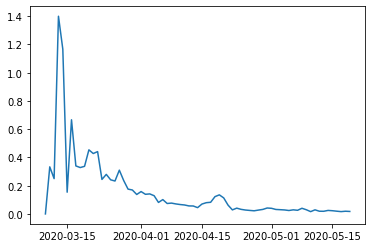

In [76]:
plt.plot(ohio_data['record_date'], ohio_data['ROC'])

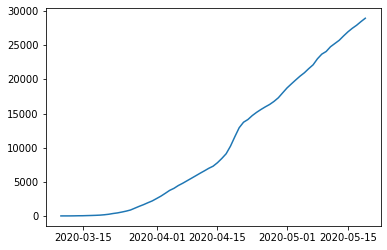

In [78]:
plt.plot(ohio_data['record_date'], ohio_data['confirmed'])